# Google Playstore Case Study

In [1]:
#import the libraries
import pandas as pd, numpy as np

In [2]:
#read the dataset and the shape
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.shape

(10841, 13)

In [3]:
# Print first 5 records
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
inp1 = inp0[-inp0.Rating.isnull()]
inp1.Rating.isnull().sum()

0

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
inp1.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                              21516.5
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:
#Drop the row having shifted values
inp1 = inp1.drop([10472])

#Check the nulls againin Android version column to cross-verify
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [13]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [14]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [15]:
#Check the nulls in the entire dataframe again
inp1['Android Ver'].isnull().sum()

0

In [16]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
9.3.52                   1
4.7.6                    1
v3.4.0-3                 1
0.2.9.17                 1
5.12.1                   1
Name: Current Ver, Length: 2638, dtype: int64

In [17]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [18]:
inp1['Current Ver'].isnull().sum()

0

In [19]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
9.3.52                   1
4.7.6                    1
v3.4.0-3                 1
0.2.9.17                 1
5.12.1                   1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [20]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
#Checking unique values in Price for numerice calculation
inp1.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [22]:
#Write the function to make the changes
inp1.Price = [x.strip('$') for x in inp1.Price]
inp1['Price'] = inp1['Price'].astype(float)



In [23]:
inp1.Price.mean()

0.9609278240444066

In [24]:
#Verify the dtype of Price once again
inp1.Price.dtypes

dtype('float64')

In [25]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

2        83
3        78
4        74
5        74
1        67
         ..
39041     1
32381     1
18921     1
2509      1
2707      1
Name: Reviews, Length: 5992, dtype: int64

In [26]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype(int)

#Check the quantitative spread of this dataframe
inp1.Reviews.describe()/10000

count       0.936600
mean       51.404984
std       314.404213
min         0.000100
25%         0.018625
50%         0.593050
75%         8.153275
max      7815.830600
Name: Reviews, dtype: float64

In [27]:
#Analyse the Installs Column
inp1.Installs


0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [28]:
#Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1.Installs = [x.strip('+') for x in inp1.Installs]
# inp1.Installs = inp1.Installs.astype(int)
inp1.Installs

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10834           500
10836         5,000
10837           100
10839         1,000
10840    10,000,000
Name: Installs, Length: 9366, dtype: object

In [29]:
inp1.Installs = [x.replace(',','') for x in inp1.Installs]
inp1.Installs = inp1.Installs.astype(float)
inp1.Installs.dtype


dtype('float64')

In [30]:
inp1.quantile([0.5],axis = 0)

,Rating,Reviews,Size,Installs,Price
0.5,4.3,5930.5,21000.0,500000.0,0.0


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [31]:
#Perform the sanity checks on the Reviews column
inp1.Reviews.describe()/10000

count       0.936600
mean       51.404984
std       314.404213
min         0.000100
25%         0.018625
50%         0.593050
75%         8.153275
max      7815.830600
Name: Reviews, dtype: float64

In [32]:
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [33]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
inp1 = inp1[(inp1.Reviews <= inp1. Installs)]

In [35]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type == 'Free') & (inp1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [36]:
#Calculating IQR of Price Column
inp1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

#### Outliers Analysis Using Boxplot

In [37]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

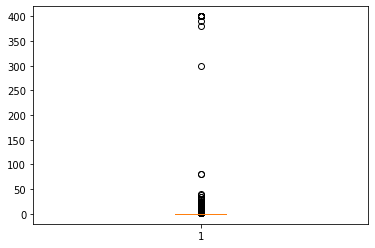

In [38]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [39]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9344.000000,9.344000e+03,9344.000000,9.344000e+03,9344.000000
mean,4.191695,5.152581e+05,22732.932449,1.793956e+07,0.334463
std,0.515004,3.147643e+06,21316.475007,9.134144e+07,2.169925
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.880000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.998500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.222650e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,79.990000


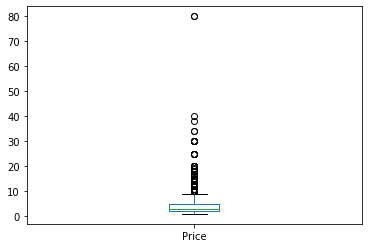

In [41]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()


In [42]:
#Check the apps with price more than 30
inp1[inp1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [43]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]

### Histograms


In [44]:
?plt.hist

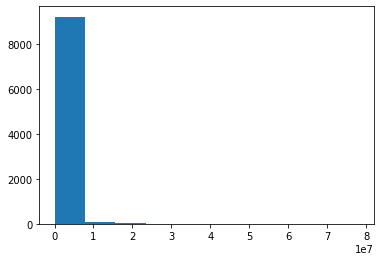

In [45]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

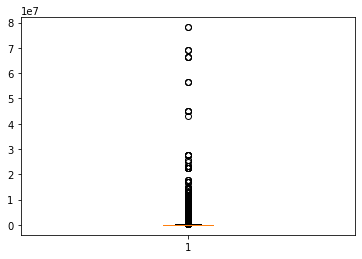

In [46]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [47]:
#Check records with 10 million reviews
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,1.000000e+08,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,1.000000e+08,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,1.000000e+08,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [48]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

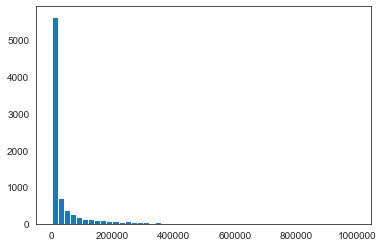

In [121]:
# Create a histogram again and check the peaks
plt.hist(inp1.Reviews, bins = 50)
plt.show()

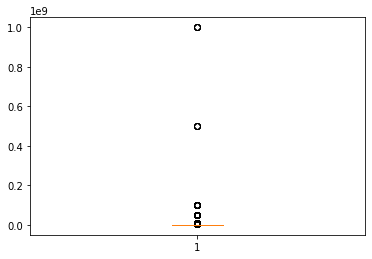

,Rating,Reviews,Size,Installs,Price
count,8634.000000,8634.000000,8634.000000,8.634000e+03,8634.000000
mean,4.172492,68383.348853,21636.459060,4.288536e+06,0.324913
std,0.528913,156335.806417,20663.668474,2.864650e+07,1.731362
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,4.000000,143.250000,6000.000000,1.000000e+04,0.000000
50%,4.300000,3641.000000,18000.000000,1.000000e+05,0.000000
75%,4.500000,46070.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,995002.000000,100000.000000,1.000000e+09,29.990000


In [50]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()
inp1.describe()

In [123]:
#Clean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8620, 15)

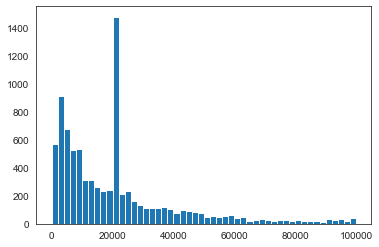

In [124]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size, bins = 50)
plt.show()

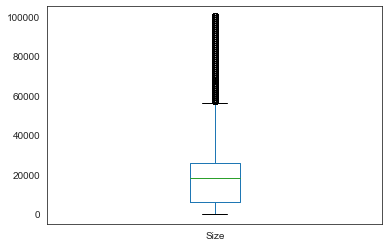

In [125]:
#Question - Create a boxplot for the Size column and report back the median value
inp1["Size"].plot.box()

### Data Visualisation with Seaborn

In [126]:
#import the necessary libraries
import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns

#### Distribution Plots

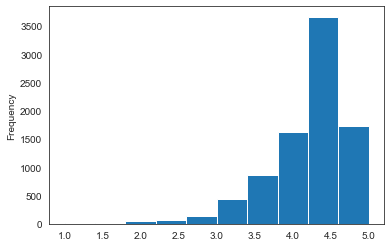

In [128]:
#Plotting histogram before the seaborn
inp1.Rating.plot.hist()
plt.show()

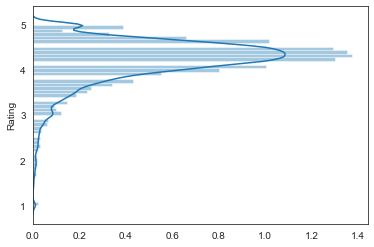

In [129]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating, vertical = True)
plt.show()

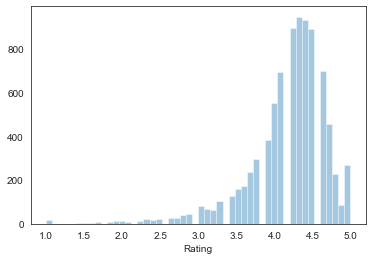

In [130]:
sns.distplot(inp1.Rating,kde = False)

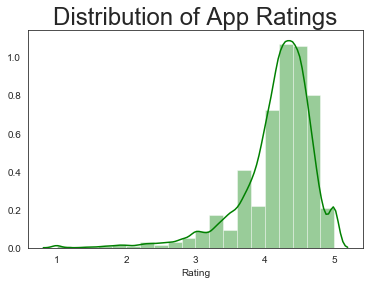

In [133]:
#Binning
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title('Distribution of App Ratings', fontsize = 24)
plt.show()

#### Styling Options

In [61]:
?sns.set_style

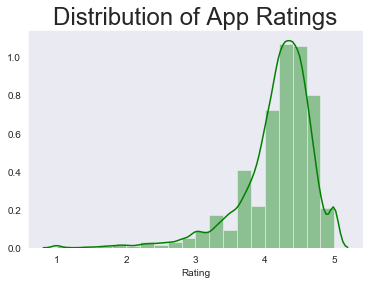

In [62]:
#Check all the styling options
sns.set_style('dark')
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title('Distribution of App Ratings', fontsize = 24)
plt.show()

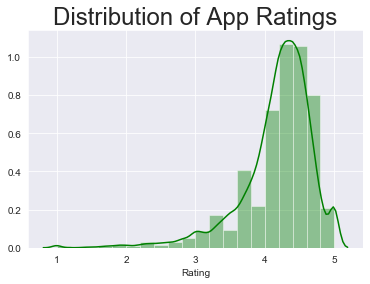

In [63]:
#Check all the styling options
sns.set_style('darkgrid')
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title('Distribution of App Ratings', fontsize = 24)
plt.show()

In [64]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

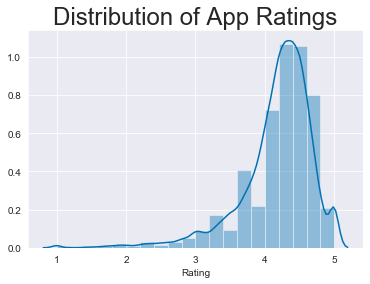

In [65]:
plt.style.use('seaborn-colorblind')
sns.distplot(inp1.Rating, bins = 20)
plt.title('Distribution of App Ratings', fontsize = 24)
plt.show()

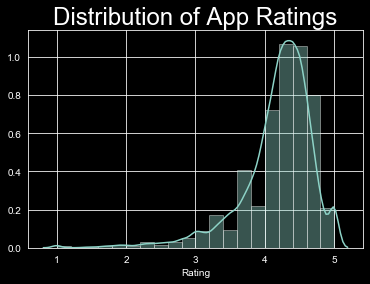

In [66]:
plt.style.use('dark_background')
sns.distplot(inp1.Rating, bins = 20)
plt.title('Distribution of App Ratings', fontsize = 24)
plt.show()

In [67]:
plt.style.use('default')
%matplotlib inline

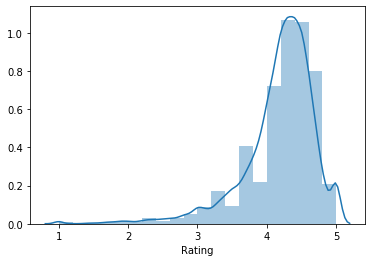

In [68]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins = 20)
plt.show()

#### Pie-Chart and Bar Chart

In [69]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [70]:
#Remove the rows with values which are less represented 
inp1 = inp1[~(inp1['Content Rating'].isin(['Unrated','Adults only 18+']))]
inp1.shape

(8620, 13)

In [71]:
#Reset the index
inp1.reset_index(inplace = True, drop = True)
inp1.info

<bound method DataFrame.info of                                                     App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
8615                                      FR Calculator               FAMILY   
8616                                   Sya9a Maroc - FR               FAMILY   
8617                   Fr. Mike Schmitz Audio Teachings               FAMILY   
8618                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
8619      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      R

In [72]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

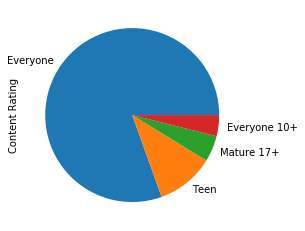

In [73]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()


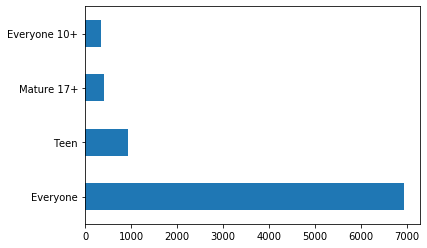

In [74]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.barh()
plt.show()


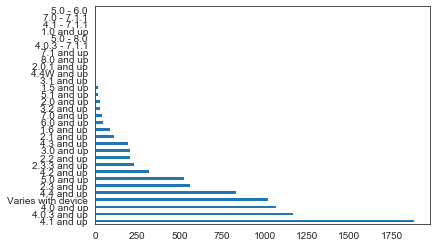

In [134]:
#Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts().plot.barh()
plt.show()

#### Scatter Plots

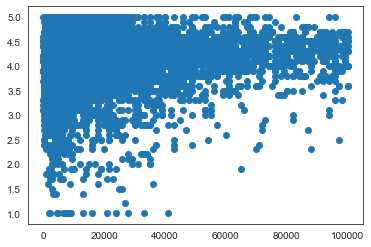

In [135]:
##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [136]:
?sns.jointplot

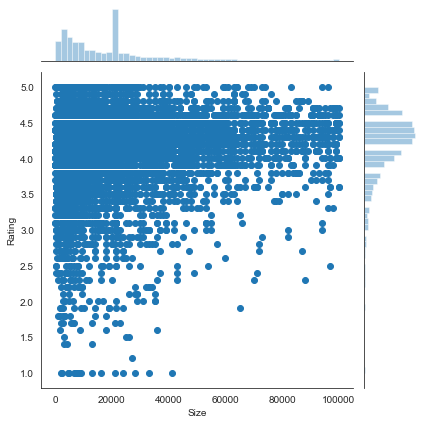

In [78]:
### Plot the same thing now using a jointplot
sns.set_style('white')
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

#### To Show Pearsonr
#### Plot a jointplot for Price and Rating

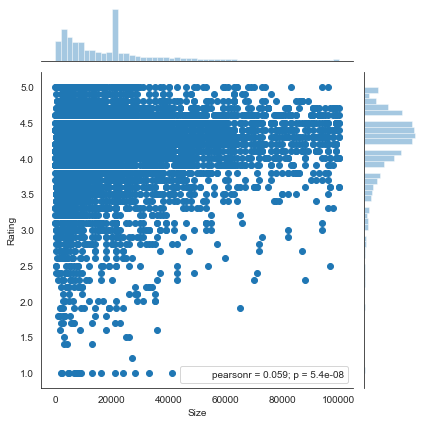

In [137]:
#Import this library
import scipy.stats as stats

#Change the code to the following
sns.jointplot(inp1.Size, inp1.Rating, stat_func = stats.pearsonr )

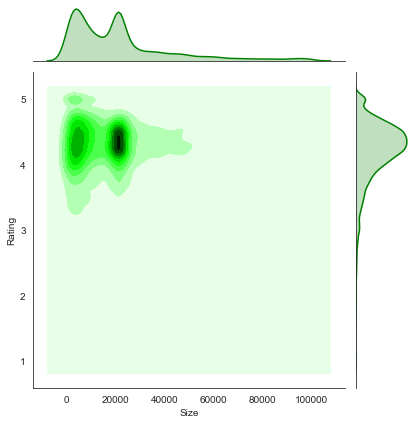

In [138]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde',color = 'G')
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

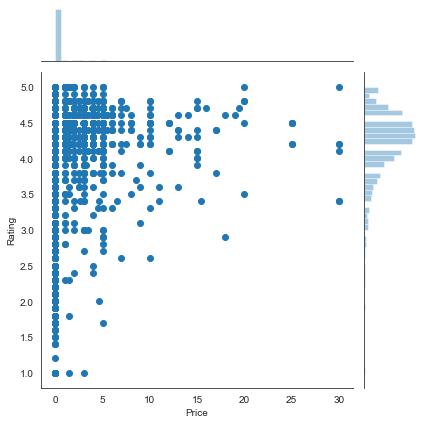

In [139]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating)
plt.show()

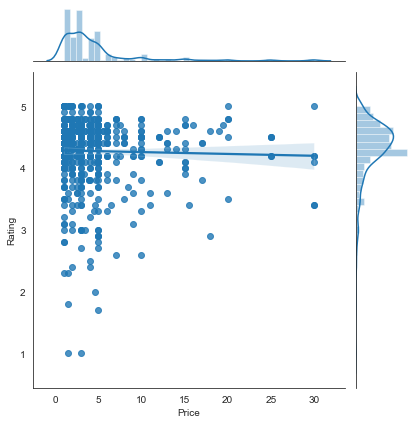

In [140]:
inp2 = inp1[inp1.Price!= 0]
sns.jointplot(inp2.Price, inp2.Rating, kind = "reg") 

**Pair Plots**

In [84]:
?sns.pairplot

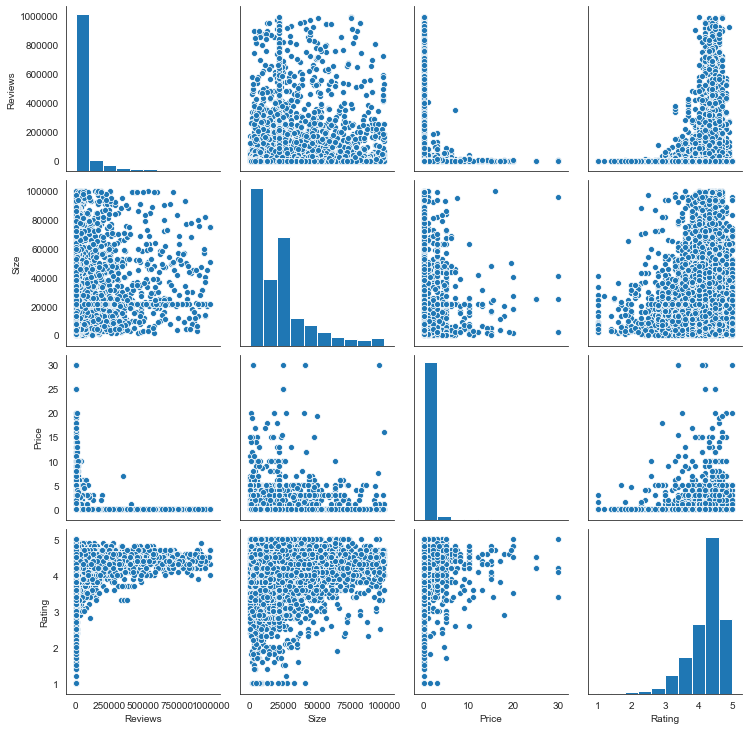

In [141]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()

**Bar Charts Revisited**

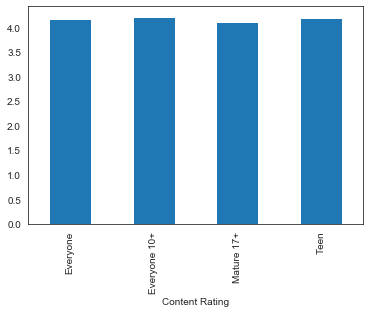

In [86]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

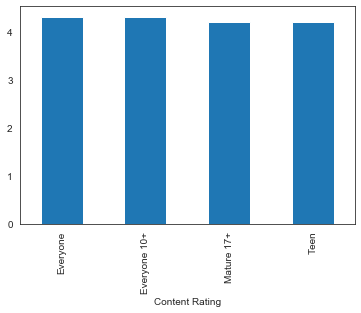

In [87]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

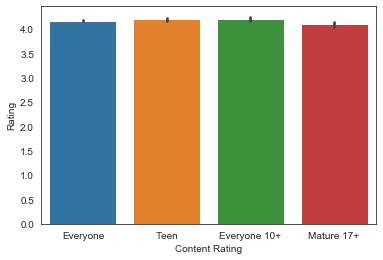

In [88]:
sns.barplot(data = inp1, x='Content Rating',y='Rating')
plt.show()

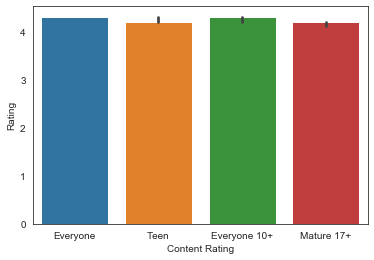

In [89]:
##Plot the above bar plot using the estimator parameter ## USING SEABORN
sns.barplot(data=inp1, x = 'Content Rating', y = 'Rating',estimator = np.median)
plt.show()

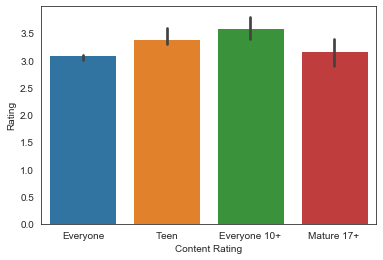

In [90]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data = inp1, x='Content Rating', y='Rating',estimator = lambda x : np.quantile(x,0.05))

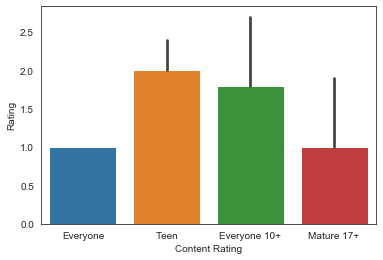

In [91]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating', estimator = np.min)

__Box Plots Revisited__



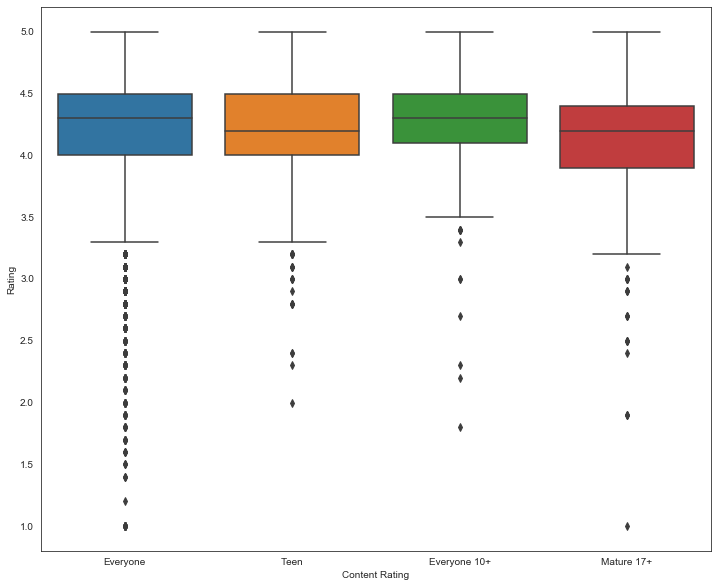

In [92]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize = [12,10])
sns.boxplot(data = inp1, x='Content Rating', y = 'Rating')
plt.show()

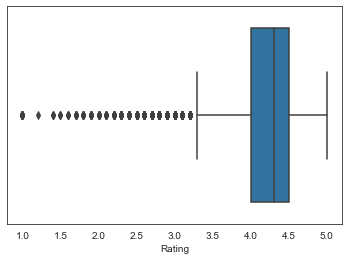

In [93]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp1.Rating)

In [94]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
#sns.boxplot()
inp1.Genres.value_counts()

Tools                                  694
Entertainment                          508
Education                              464
Medical                                344
Finance                                315
                                      ... 
Adventure;Brain Games                    1
Lifestyle;Education                      1
Health & Fitness;Action & Adventure      1
Racing;Pretend Play                      1
Strategy;Education                       1
Name: Genres, Length: 115, dtype: int64

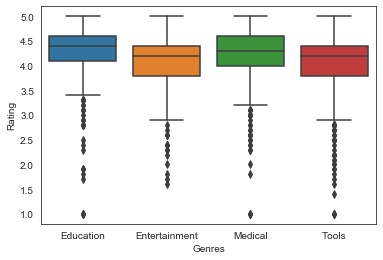

In [95]:
#,'Entertainment','Education','Medical'
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]
#Finally, plot a box plot 
sns.boxplot(inp5['Genres'],inp1.Rating)

#### Heat Maps

In [96]:
?pd.qcut

In [142]:
##Ratings vs Size vs Content Rating
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])

In [143]:
pd.pivot_table(data = inp1, index = 'Content Rating', columns = "Size_Bucket", values = "Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [144]:
pd.pivot_table(data = inp1, index = 'Content Rating', columns = "Size_Bucket", values = "Rating", aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [145]:
res = pd.pivot_table(data = inp1, index = 'Content Rating', columns = "Size_Bucket", values = "Rating", aggfunc = lambda x : np.quantile(x,0.2))

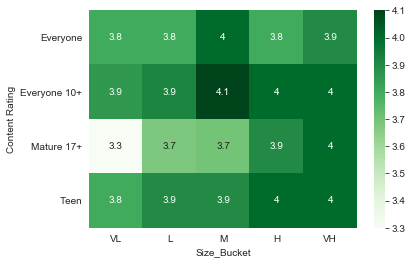

In [147]:
sns.heatmap(res, cmap = 'Greens', annot = True)

###  Additional Visualisations

#### Line Plots

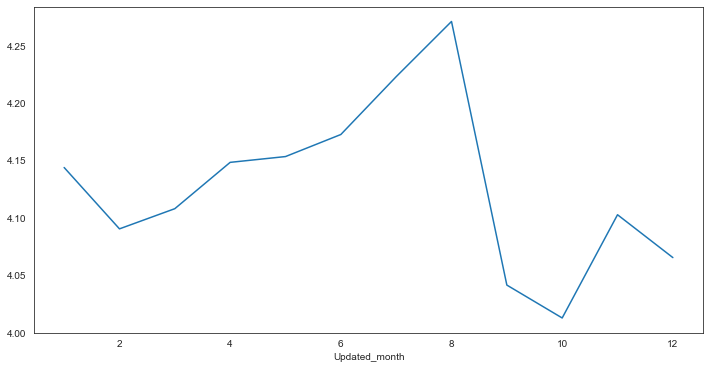

In [109]:
## Extract the month from the Last Updated Date
inp1['Last Updated'].head()
inp1['Updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month
plt.figure(figsize = [12,6])
inp1.groupby(['Updated_month'])['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

In [112]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data =inp1, values = 'Installs', index = "Updated_month", columns=['Content Rating'], aggfunc = sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [113]:
##Store the table in a separate variable
monthly = pd.pivot_table(data =inp1, values = 'Installs', index = "Updated_month", columns=['Content Rating'], aggfunc = sum)

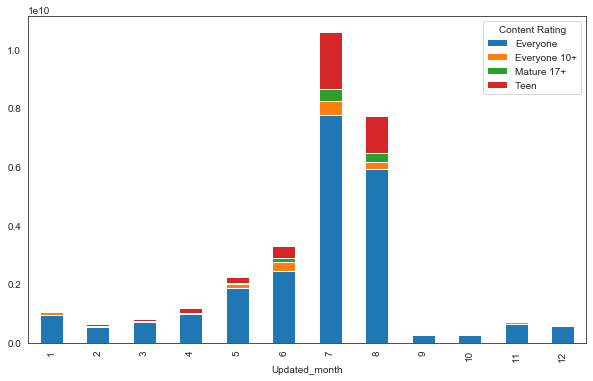

In [114]:
##Plot the stacked bar chart.
monthly.plot(kind = 'bar', stacked = "True", figsize= [10,6])

In [115]:
monthly_perc = monthly[['Everyone','Everyone 10+','Mature 17+','Teen']].apply(lambda x : x/x.sum(), axis = 1)

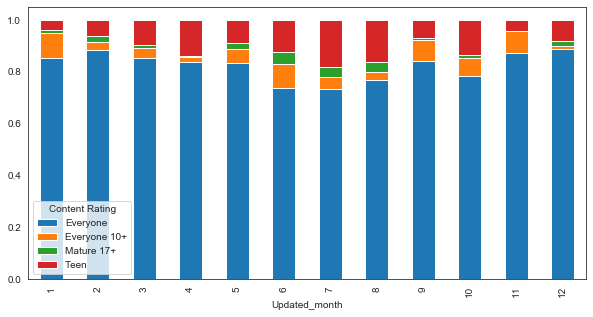

In [116]:
monthly_perc.plot(kind = 'bar', stacked = 'True', figsize=[10,5])

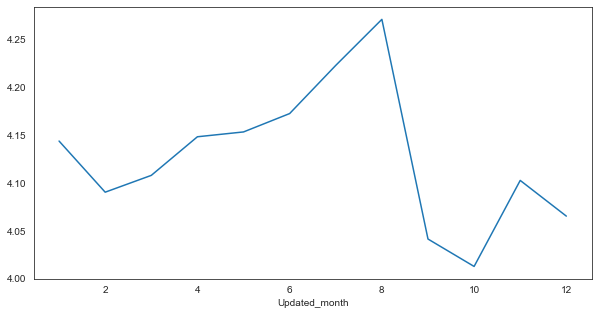

In [117]:
plt.figure(figsize=[10,5])
inp1.groupby(['Updated_month'])['Rating'].mean().plot()
plt.show()